## Project Description

A hands on project to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database.

## Data Description

The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.


## Objective

The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyze the sentiment of the customers.

In [1]:
%tensorflow_version 2.x
import tensorflow 
tensorflow.__version__

'2.4.0'

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### Change current working directory to project folder

In [3]:
import os
cwd_old = os.getcwd()
print('\nWorking directory: ', cwd_old)

os.chdir('gdrive/MyDrive/AIML/Projects/NLP/Sentiment Analysis')
print('Working Directory has changed')

#verifying the currebt directory has changed
cwd_new = os.getcwd()
print('\nCurrent Working Directory:', cwd_new)


Working directory:  /content
Working Directory has changed

Current Working Directory: /content/gdrive/MyDrive/AIML/Projects/NLP/Sentiment Analysis


#### Import Packages

In [4]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Initialize the random number generator
random_state = 42
tensorflow.random.set_seed(random_state)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, MaxPooling1D, Conv1D, TimeDistributed, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#### Import the data

*   Use imdb.load_data() method
*   Get train and test set
*   Take 10000 most frequent words





In [7]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)

17465344/17464789 [==============================] - 0s 0us/step


#### Pad each sentence to be of same length

*   Take maximum sequence length as 300



In [8]:
max_len = 300

X_train = pad_sequences(X_train, maxlen = max_len, padding = 'pre')
X_test = pad_sequences(X_test, maxlen = max_len, padding = 'pre')

X = np.concatenate((X_train, X_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = random_state, shuffle = True)

#### Print shape of features and labels

*   Number of review, number of words in each review


In [9]:
print(f'Number of rows in training dataset: {X_train.shape[0]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(X_train)))}')

Number of rows in training dataset: 32000
Number of unique words in training dataset: 9999


In [10]:
print(f'Number of rows in validation dataset: {X_valid.shape[0]}')
print(f'Number of unique words in validation dataset: {len(np.unique(np.hstack(X_valid)))}')

Number of rows in validation dataset: 8000
Number of unique words in validation dataset: 9984


In [11]:
print(f'Number of rows in test dataset: {X_test.shape[0]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(X_test)))}')

Number of rows in test dataset: 10000
Number of unique words in test dataset: 9995


*   Number of labels



In [12]:
print(f'Number of columns in training dataset: {X_train.shape[1]}')

Number of columns in training dataset: 300


In [13]:
print(f'Number of columns in validation dataset: {X_valid.shape[1]}')

Number of columns in validation dataset: 300


In [14]:
print(f'Number of columns in testing dataset: {X_test.shape[1]}')

Number of columns in testing dataset: 300


In [15]:
print(f'Unique categories: {np.unique(y_train), np.unique(y_valid), np.unique(y_test)}')

Unique categories: (array([0, 1]), array([0, 1]), array([0, 1]))


#### Decode the feature value to get original sentence

*   First, retrieve a dictionary that contains the mapping of words to their index in the IMDB dataset
*   Now use the dictionary to get the original words from the encoding for a particular sentence
*   Get the sentiment for the above sentence - **positive (1)** and **negative (0)**

In [16]:
def decode_review(x, y):
  w2i = imdb.get_word_index()
  w2i = {k:(v+3) for k, v in w2i.items()}
  w2i['<PAD>'] = 0
  w2i['<START>'] = 1
  w2i['<UNK>'] = 2
  i2w = {i: w for w, i in w2i.items()}

  ws = (' '.join(i2w[i] for i in x))
  print(f'Review: {ws}')
  print(f'Actual Sentiment: {y}')
  return w2i, i2w

In [17]:
w2i, i2w = decode_review(X_train[0], y_train[0])

1646592/1641221 [==============================] - 0s 0us/step
Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> the only possible way to enjoy this flick is to bang your head against the wall allow some internal <UNK> of the brain let a bunch of your brain cells die and once you are officially mentally retarded perhaps then you might enjoy this film br br the only saving grace was the story between <UNK> and stephanie govinda was excellent in the role of the cab driver and so was the brit girl perhaps if they would have created the whole movie on their <UNK> in india and how they eventually fall in l

In [18]:
# get first 50 key, value pairs from id to word dictionary
print(list(islice(i2w.items(), 0, 50))) 

[(34704, 'fawn'), (52009, 'tsukino'), (52010, 'nunnery'), (16819, 'sonja'), (63954, 'vani'), (1411, 'woods'), (16118, 'spiders'), (2348, 'hanging'), (2292, 'woody'), (52011, 'trawling'), (52012, "hold's"), (11310, 'comically'), (40833, 'localized'), (30571, 'disobeying'), (52013, "'royale"), (40834, "harpo's"), (52014, 'canet'), (19316, 'aileen'), (52015, 'acurately'), (52016, "diplomat's"), (25245, 'rickman'), (6749, 'arranged'), (52017, 'rumbustious'), (52018, 'familiarness'), (52019, "spider'"), (68807, 'hahahah'), (52020, "wood'"), (40836, 'transvestism'), (34705, "hangin'"), (2341, 'bringing'), (40837, 'seamier'), (34706, 'wooded'), (52021, 'bravora'), (16820, 'grueling'), (1639, 'wooden'), (16821, 'wednesday'), (52022, "'prix"), (34707, 'altagracia'), (52023, 'circuitry'), (11588, 'crotch'), (57769, 'busybody'), (52024, "tart'n'tangy"), (14132, 'burgade'), (52026, 'thrace'), (11041, "tom's"), (52028, 'snuggles'), (29117, 'francesco'), (52030, 'complainers'), (52128, 'templarios')

#### Define Model
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - **tensorflow.keras** embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in **return_sequences** as True
- Add a **TimeDistributed** layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [19]:
def create_model():
  sentiment_model = Sequential([
                                Embedding(vocab_size, 100, input_length = max_len),
                                LSTM(100, activation = 'relu', return_sequences = True),
                                TimeDistributed(Dense(100, activation = 'relu')),
                                TimeDistributed(Dense(100, activation = 'relu')),
                                Flatten(),
                                Dense(50),
                                Dense(1, activation = 'sigmoid')])

  return sentiment_model

#### Print model summary

In [20]:
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 100)          80400     
_________________________________________________________________
time_distributed (TimeDistri (None, 300, 100)          10100     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 300, 100)          10100     
_________________________________________________________________
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1500050   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5

#### Compile the model
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [21]:
init_lr = 1e-4
epochs = 20

opt = Adam(lr = init_lr, decay = (init_lr/epochs))
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

#### Fit the model

In [22]:
#checkpoint_path = "/content/gdrive/MyDrive/AIML/Projects/NLP/Sentiment Analysis/training_1/cp-{epoch:04d}.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Creating a callback that saves the model
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', save_best_only = True, mode = 'auto')
stop = EarlyStopping(monitor = 'val_loss', patience = 5, mode = 'min')

In [23]:
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = epochs, batch_size = batch_size, callbacks = [checkpoint, stop])

Epoch 1/20
1000/1000 [==============================] - 306s 305ms/step - loss: 0.5422 - accuracy: 0.6787 - val_loss: 0.2773 - val_accuracy: 0.8863
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
1000/1000 [==============================] - 296s 296ms/step - loss: 0.2242 - accuracy: 0.9140 - val_loss: 0.2616 - val_accuracy: 0.8909
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
1000/1000 [==============================] - 293s 293ms/step - loss: 0.1712 - accuracy: 0.9344 - val_loss: 0.2801 - val_accuracy: 0.8878
Epoch 4/20
1000/1000 [==============================] - 292s 292ms/step - loss: 0.1399 - accuracy: 0.9499 - val_loss: 0.2936 - val_accuracy: 0.8894
Epoch 5/20
1000/1000 [==============================] - 286s 286ms/step - loss: 0.1206 - accuracy: 0.9562 - val_loss: 0.3157 - val_accuracy: 0.8864
Epoch 6/20
1000/1000 [==============================] - 285s 285ms/step - loss: 0.0907 - accuracy: 0.9696 - val_loss: 0.3657 - val_accuracy: 0.8

#### Evaluate model

In [26]:
# Load the previously saved model
from tensorflow.keras.models import load_model
model = load_model('model-002.model')

# Evaluation of model
training_loss, training_accuracy = model.evaluate(X_train, y_train)
print('Training Loss: %.4f and Training Accuracy: %.2f%%' % (training_loss, training_accuracy * 100))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Loss on test set: %.4f and Accuracy on Test Set: %.2f%%' % (test_loss, test_accuracy * 100)) 

1000/1000 [==============================] - 74s 74ms/step - loss: 0.1611 - accuracy: 0.9434
Training Loss: 0.1611 and Training Accuracy: 94.34%
313/313 [==============================] - 23s 73ms/step - loss: 0.2626 - accuracy: 0.8932
Loss on test set: 0.2626 and Accuracy on Test Set: 89.32%


In [27]:
y_pred = model.predict_classes(X_test)
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4818
           1       0.90      0.89      0.90      5182

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000




 Confusion matrix:
 [[4331  581]
 [ 487 4601]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap')

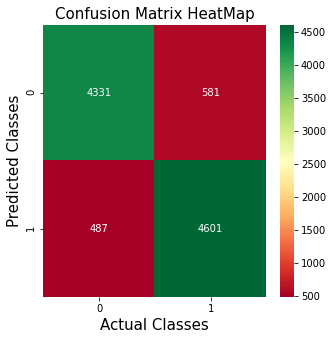

In [28]:
cfm_lstm = confusion_matrix(y_test, y_pred)
print('\n Confusion matrix:\n', cfm_lstm)

plt.figure(figsize = (5, 5))
sns.heatmap(cfm_lstm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15)

#### Predict on one sample

In [29]:
decode_review(X_test[10], y_test[10])
print(f'Predicted Sentiment: {y_pred[10][0]}')

Review: <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

Thus, from this exercise we were able to conclude the following points:

* We were asked to perform to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database.   
* The best obtained model (after training) we got an accuracy of about **94.34%** on training data set and **89.32%** on test data
* From the confusion matrix we can see that, out of 4818 negative sentiments present in the test data, it was able to correctly predict for 4331 negative sentiments. Out of 5182 positive sentiments the model was able to correctly predict for 4601 sentiments
* As an example, the model was correctly able to predict the sentiment for the 10th review present in the test set.



